## Load the dataset

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [70]:
df = pd.read_csv('https://raw.githubusercontent.com/iwakkk/Data-Mining-Dataset/refs/heads/main/breast-cancer.csv')

df.head(5)

# Load datasaet dari url dan menampilkan 5 baris teratas

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Exploratory Data Analysis

In [71]:
df.info()

# Menampilkan info dari dataset, dari sini kita bisa tahu bahwa dataset ini tidak memiliki null values karena range index 569 entries dan non null tiap kolom juga 569

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [72]:
df.describe()

# Menampilkan overview dari dataset, kita bisa tahu jumlah, rata2, std, min, max, q1, q3 pada setiap kolom

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [73]:
label_encoder = LabelEncoder()

df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])
df.head(5)

# Mengubah value dari colomn diagnosis M(tumor ganas) menjadi 1 dan B(tumor jinak) menjadi 0

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


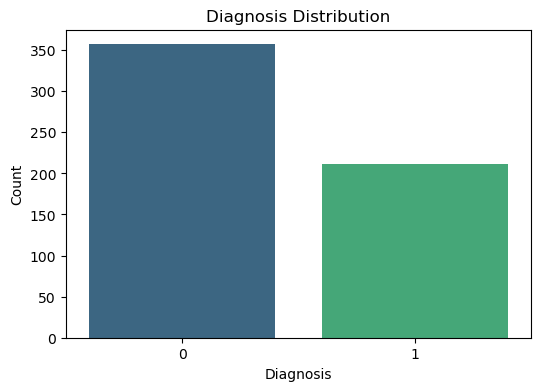

In [74]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='diagnosis', palette='viridis')
plt.title('Diagnosis Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

# Memvisualisasikan perbandingan jumlah orang yang terdiagnosa malignan dan belign dengan menggunakan barchart.

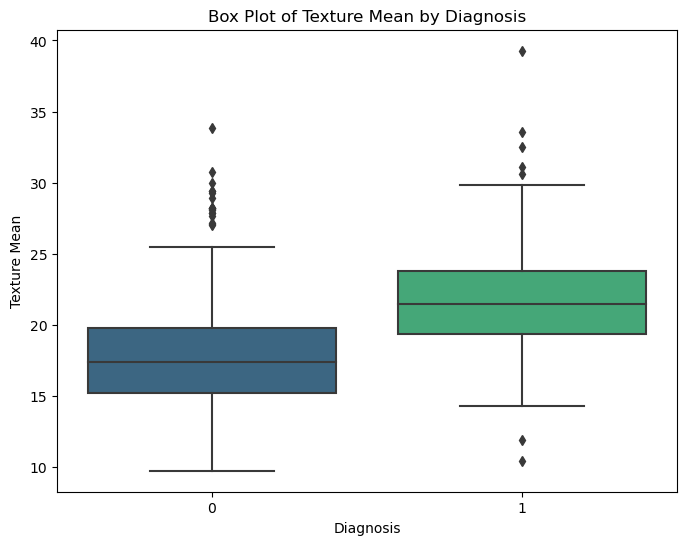

In [75]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='diagnosis', y='texture_mean', palette='viridis')
plt.title('Box Plot of Texture Mean by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Texture Mean')
plt.show()

# Boxplot yang menunjukkan perbandingan texture mean orang yang terdiagnosa malignan dan belign, dari hasil boxplot, orang yang terdiagnosa malignan memiliki texture mean yang lebih tinggi.


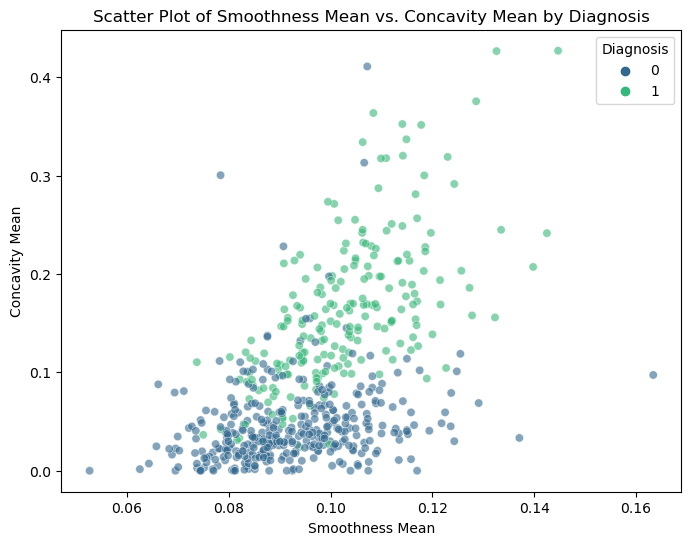

In [76]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='smoothness_mean', y='concavity_mean', hue='diagnosis', palette='viridis', alpha=0.6)
plt.title('Scatter Plot of Smoothness Mean vs. Concavity Mean by Diagnosis')
plt.xlabel('Smoothness Mean')
plt.ylabel('Concavity Mean')
plt.legend(title='Diagnosis')
plt.show()

# Scatter plot yang membandingkan hubungan concavity mean dan smoothness mean dengan diagnosa, dari hasil scatterplotnya, kebanyakan orang yang terdiagnosa malignan memiliki concavity yang lebih tinggi.


In [77]:
X = df.drop('diagnosis',axis=1)
y = df['diagnosis']

# Membagi dataset menjadi X dan y, dimana X adalah kolom selain target (diagnosis) dan y adalah kolom targetnya (diagnosis)

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

# Membagi data 20 persen untuk test, 80 persen untuk train, bisa dilihat dalam shape, train memiliki 455 baris dan test memiliki 114 baris

Shape of X_train: (455, 31)
Shape of X_test: (114, 31)


### Entropy

In [79]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth= 3, random_state=42)
clf_entropy.fit(X_train, y_train)

# Membuat clasifier entropy untuk decision tree dengan max depth 3 agar tidak terlalu panjang

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [80]:
y_pred_entropy = clf_entropy.predict(X_test)

accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f'Accuracy with Entropy: {accuracy_entropy:.4f}')

# Memasukkan y kedalam entropy untuk diprediksi dengan menggunakan model entropy dan akurasi dari model ini adalah 96% 

Accuracy with Entropy: 0.9649


In [81]:
train_set_score_en = clf_entropy.score(X_train, y_train)
test_set_score_en = clf_entropy.score(X_test, y_test)

print(f'Training set score with Entropy : {train_set_score_en}')
print(f'Test set score with Entropy : {test_set_score_en}')

# Melihat score train dan test, dari hasilnya, gap yang dimiliki antara train dengan test tidak jauh sehingga termasuk well-fitted

Training set score with Entropy : 0.9802197802197802
Test set score with Entropy : 0.9649122807017544


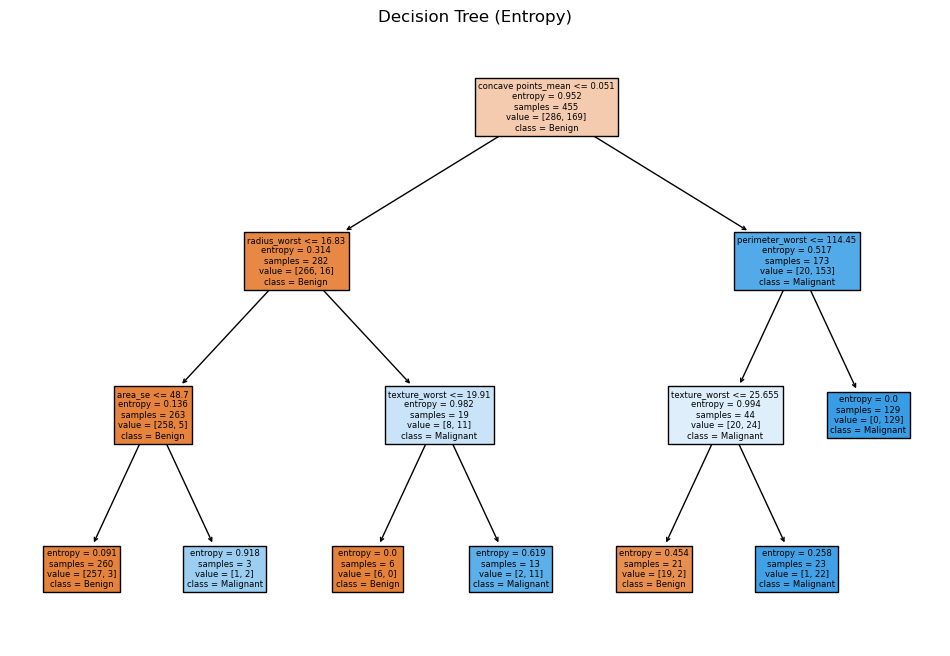

In [82]:
plt.figure(figsize=(12, 8))
tree.plot_tree(clf_entropy, 
               feature_names=X.columns.tolist(), 
               class_names=['Benign', 'Malignant'],
               filled=True)
plt.title("Decision Tree (Entropy)")
plt.show()

# Hasil decision tree menggunakan entropy

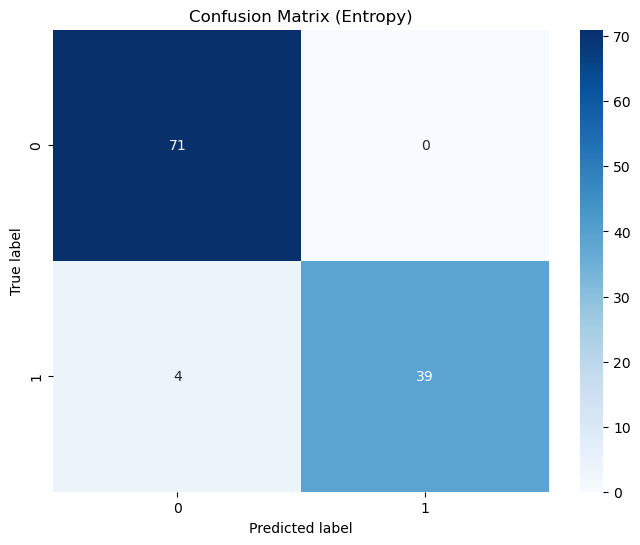

In [83]:
cm = confusion_matrix(y_test, y_pred_entropy)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.title('Confusion Matrix (Entropy)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Hasil confusion matriks dari entropy, memiliki 110 dari 114 data yang diprediksi benar oleh entropy.

In [84]:
class_report_en = classification_report(y_test, y_pred_entropy)

print("Classification Report Entropy: \n", class_report_en)

# Menampilkan classification report dari entropy, accuracy yang didapat adalah 96%

Classification Report Entropy: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       1.00      0.91      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



### Gini

In [85]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

# Membuat classifier gini untuk membuat decision tree dengan metode gini, sama seperti sebelumnya, max depth 3 agar tidak terlalu panjang

DecisionTreeClassifier(max_depth=3, random_state=0)

In [86]:
y_pred_gini = clf_gini.predict(X_test)

accuracy_gini = accuracy_score(y_test, y_pred_gini)
print(f'Accuracy with Gini : {accuracy_gini:4f}')

# Memasukkkan y kedalam gini dan melihat akurasi yang dimiliki 95%

Accuracy with Gini : 0.947368


In [87]:
train_set_score_gini = clf_gini.score(X_train, y_train)
test_set_score_gini = clf_gini.score(X_test, y_test)

print(f'Training set score with Gini : {train_set_score_gini}')
print(f'Test set score with Gini : {test_set_score_gini}')

# Sama dengan entropy, hasil training dan test set gini tidak memiliki perbedaan yang signifikan sehingga termasuk well-fitted


Training set score with Gini : 0.978021978021978
Test set score with Gini : 0.9473684210526315


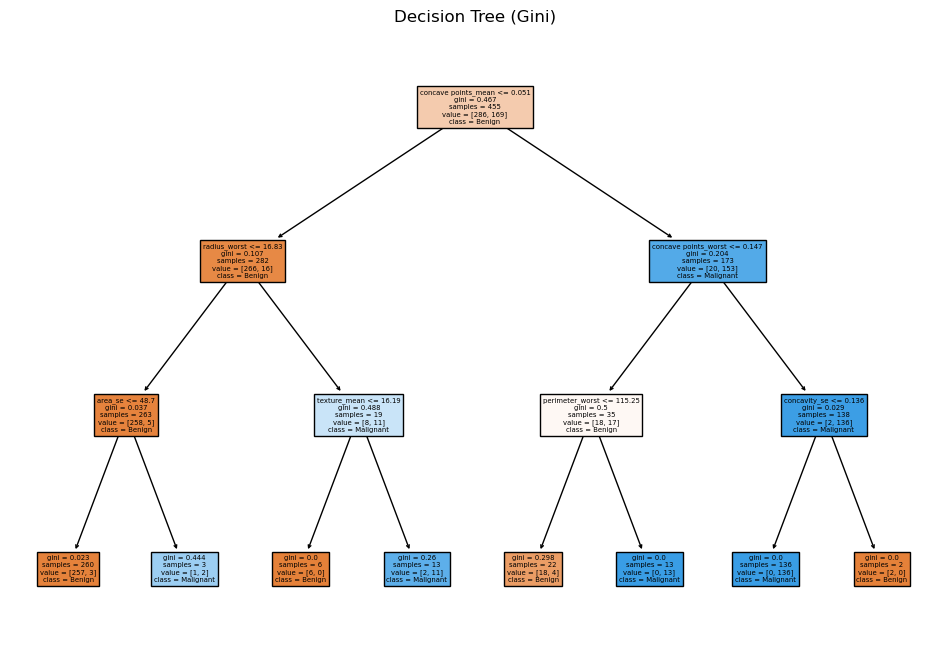

In [88]:
plt.figure(figsize=(12, 8))
tree.plot_tree(clf_gini, 
               feature_names=X.columns.tolist(), 
               class_names=['Benign', 'Malignant'],
               filled=True)
plt.title("Decision Tree (Gini)")
plt.show()

# Hasil decision tree dengan menggunakan gini

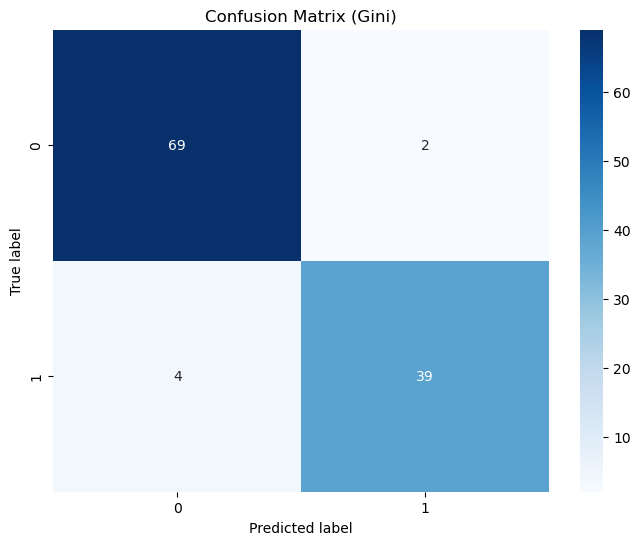

In [89]:
cm = confusion_matrix(y_test, y_pred_gini)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.title('Confusion Matrix (Gini)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Confusion matriks dari gini, yang berhasil memprediksi 108 dari 114 data benar.

In [90]:

class_report_gini = classification_report(y_test, y_pred_gini)
print("Classification Report Gini Index: \n", class_report_gini)

# Menampilkan classification report dari gini yang memiliki akurasi 95%

Classification Report Gini Index: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



### Naive Bayes

In [91]:
nb = GaussianNB()
nb.fit(X_train, y_train)

# Membuat model naive bayes dan memasukkan X dan y kedalam model yang sudah dibuat

GaussianNB()

In [92]:
y_pred_nb = nb.predict(X_test)

print(f'Accuracy : {accuracy_score(y_test, y_pred_nb)}')

# Memasukkan data ke dalam mobel Naive Bayes dan mendapatkan hasil 77%


Accuracy : 0.6140350877192983


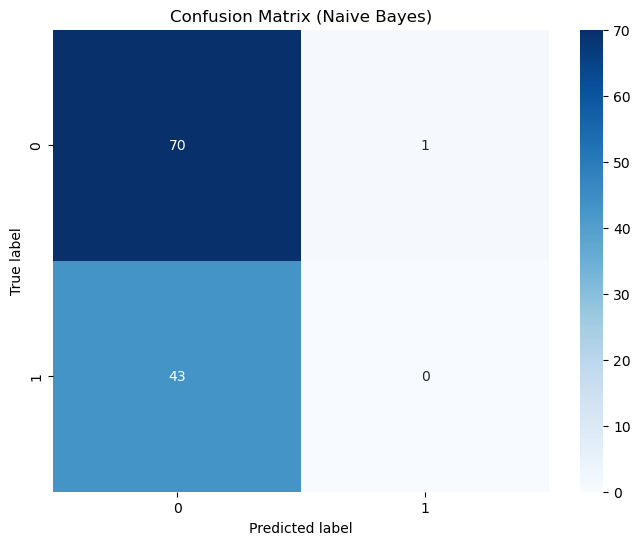

In [93]:

cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.title('Confusion Matrix (Naive Bayes)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Menampilkan heatmap dari modelling naive bayes dan hasilnya model ini dapat memprediksi 70 data dari 114z data benar

In [94]:
print(classification_report(y_test,y_pred_nb))

# Menampilkan classification report dari naive bayes yang memiliki akurasi 61%

              precision    recall  f1-score   support

           0       0.62      0.99      0.76        71
           1       0.00      0.00      0.00        43

    accuracy                           0.61       114
   macro avg       0.31      0.49      0.38       114
weighted avg       0.39      0.61      0.47       114



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

# Modelling and fitting menggunakan metode Random Forest, dengan estimator 100x.

RandomForestClassifier(random_state=42)

In [96]:
y_pred_rf = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)

print(f'Accuracy: {accuracy}')

# Melihat hasil prediksin dari random forest, didapat hasil akurasinya adalah 96%

Accuracy: 0.9649122807017544


In [ ]:
y_train_rf = rf_classifier.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_rf)
training_accuracy = accuracy_score(y_train, y_train_rf)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))

# Hasil training dan test set Random Forest memiliki akurasi training yang lebih tinggi dibandingkan testing, sehingga model ini mengalami overfitting

Testing accuracy: 0.9649
Training accuracy: 1.0000


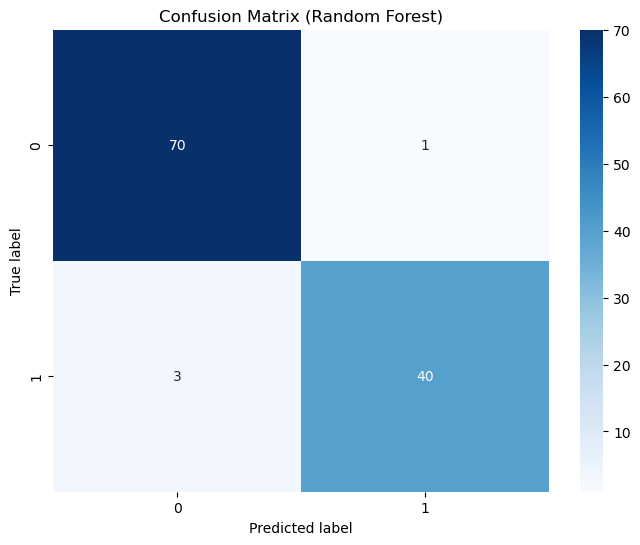

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Visualisasi heatmap dari metode Random Forest, metode ini berhasil memprediksi 110 dari 114 data benar.

In [ ]:
class_report_rf = classification_report(y_test, y_pred_rf)

print("Classification Report Random Forest: \n", class_report_rf)

# Classification report dari metode Random Forest yang memiliki akurasi 96%

Classification Report Random Forest: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
# Dari keempat model di atas, yang memiliki akurasi paling tinggi adalah Random Forest dan Entropy dengan akurasi 96%. Gini memiliki perbedaan 1 persen dibawah Entropy dan Random Forest. Sedangkan untuk Naive Bayes, akurasinya sangat rendah bila dibandingkan 3 metode sebelumnya yaitu 61% sehingga tidak dianjurkan untuk menggunakan metode Naive Bayes.